<a href="https://colab.research.google.com/github/madhan2707/ML-with-flask/blob/main/Copy_of_insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/Claimants_Data.csv')

In [ ]:
df.shape

(100156, 13)

<h3>Finding Null values</h3>

In [ ]:
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


<h3>Here we need to Label encode the Accident, policy_Type and Driving Records</h3>

In [ ]:
label=LabelEncoder()
df['Accident_Severity']=label.fit_transform(df['Accident_Severity'])
df['Driving_Record']=label.fit_transform(df['Driving_Record'])
df['Policy_Type']=label.fit_transform(df['Policy_Type'])
df['CLMAGE']=label.fit_transform(df['CLMAGE'])
df['Driving_Record']=label.fit_transform(df['Driving_Record'])

In [ ]:
scaler = StandardScaler()
df[['LOSS','CLMAGE','Settlement_Amount','Driving_Record',"Claim_Amount_Requested"]] = scaler.fit_transform(df[['LOSS','CLMAGE','Settlement_Amount','Driving_Record','Claim_Amount_Requested']])
df.head()


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1,2,0,1.0,0.0,1.0,-1.662315,-1.246894,1,-1.070387,1,1.186638,0,-1.234720
2,3,1,0.0,0.0,1.0,0.587460,1.698671,2,-0.507875,0,1.452466,1,1.215054
3,4,1,0.0,0.0,1.0,-0.987382,0.282668,1,-1.644131,0,-0.572538,0,1.215054
5,6,0,1.0,1.0,0.0,0.722446,0.103111,2,1.474869,1,-1.346086,1,1.215054
7,8,1,0.0,0.0,1.0,-1.572324,0.357845,2,-0.278568,0,-0.574984,1,1.215054


<h3>here we removing the rows where Age is less than  18 years</h3>

In [ ]:
df = df[df['CLMAGE'] >= 18]

<h3>Here we converted from String to numbers And we need To Find outliers in Claim_Amount_Requested  </h3>

In [ ]:
Q1 = df['Settlement_Amount'].quantile(0.25)
Q3 = df['Settlement_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df[(df['Settlement_Amount'] < lower_bound)]
outliers2

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['Claim_Amount_Requested'].quantile(0.25)
Q3 = df['Claim_Amount_Requested'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Claim_Amount_Requested'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['CLMAGE'].quantile(0.25)
Q3 = df['CLMAGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CLMAGE'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['LOSS'].quantile(0.25)
Q3 = df['LOSS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LOSS'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['LOSS'].quantile(0.25)
Q3 = df['LOSS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LOSS'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


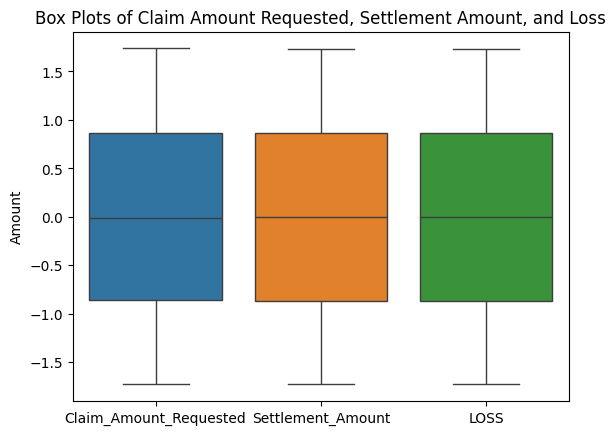

In [ ]:
sns.boxplot(data=df[['Claim_Amount_Requested', 'Settlement_Amount', 'LOSS']])
plt.title('Box Plots of Claim Amount Requested, Settlement Amount, and Loss')
plt.ylabel('Amount')
plt.show()

<h3> Here we Don't have any outliers here</h3>

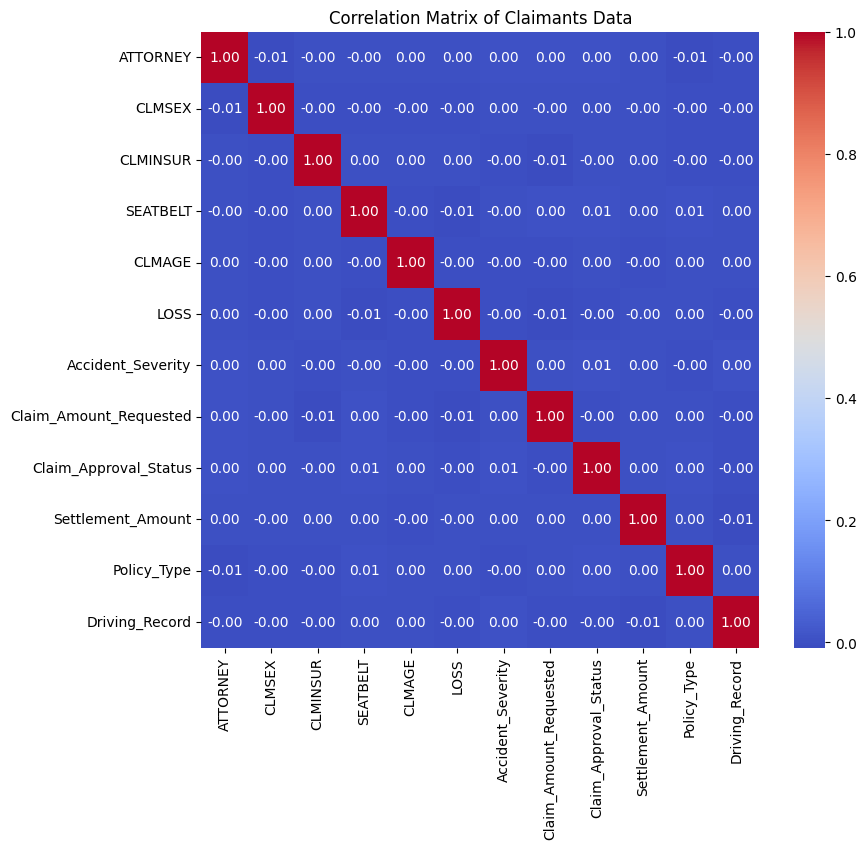

In [ ]:
DATA = df.drop('CASENUM',axis=1)
plt.figure(figsize=(9, 8))
sns.heatmap(DATA.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Claimants Data')
plt.show()

In [ ]:

X = df.drop(['ATTORNEY', 'Settlement_Amount'], axis=1)
y = df['ATTORNEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix


Accuracy: 0.49190520160049245
              precision    recall  f1-score   support

           0       0.49      0.48      0.48      8061
           1       0.50      0.50      0.50      8184

    accuracy                           0.49     16245
   macro avg       0.49      0.49      0.49     16245
weighted avg       0.49      0.49      0.49     16245

Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[3879, 4182],
       [4072, 4112]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
conf_matrix_dt


Decision Tree Accuracy: 0.4984302862419206
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      8061
           1       0.50      0.50      0.50      8184

    accuracy                           0.50     16245
   macro avg       0.50      0.50      0.50     16245
weighted avg       0.50      0.50      0.50     16245

Decision Tree Confusion Matrix:


array([[4026, 4035],
       [4113, 4071]])

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('ATTORNEY ~ Claim_Amount_Requested + Settlement_Amount + CLMAGE + Accident_Severity',data=df). fit()

In [ ]:
(model.rsquared,model.rsquared_adj)

(4.495761382161678e-05, -4.2915509925745e-06)